In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
batch_size = 128
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 40s 93ms/step - loss: 0.5531 - accuracy: 0.8034 - val_loss: 0.4229 - val_accuracy: 0.8415
Epoch 2/10
422/422 [==============================] - 38s 90ms/step - loss: 0.3563 - accuracy: 0.8728 - val_loss: 0.3350 - val_accuracy: 0.8780
Epoch 3/10
422/422 [==============================] - 38s 90ms/step - loss: 0.3084 - accuracy: 0.8891 - val_loss: 0.3026 - val_accuracy: 0.8910
Epoch 4/10
422/422 [==============================] - 38s 91ms/step - loss: 0.2799 - accuracy: 0.8981 - val_loss: 0.2763 - val_accuracy: 0.9000
Epoch 5/10
422/422 [==============================] - 38s 89ms/step - loss: 0.2574 - accuracy: 0.9056 - val_loss: 0.2793 - val_accuracy: 0.9005
Epoch 6/10
422/422 [==============================] - 38s 89ms/step - loss: 0.2384 - accuracy: 0.9122 - val_loss: 0.2863 - val_accuracy: 0.8950
Epoch 7/10
422/422 [==============================] - 38s 90ms/step - loss: 0.2205 - accuracy: 0.9184 - val_loss: 0.2586 - val_accuracy:

313/313 - 4s - loss: 0.2498 - accuracy: 0.9114 - 4s/epoch - 14ms/step
Test accuracy: 0.9114000201225281


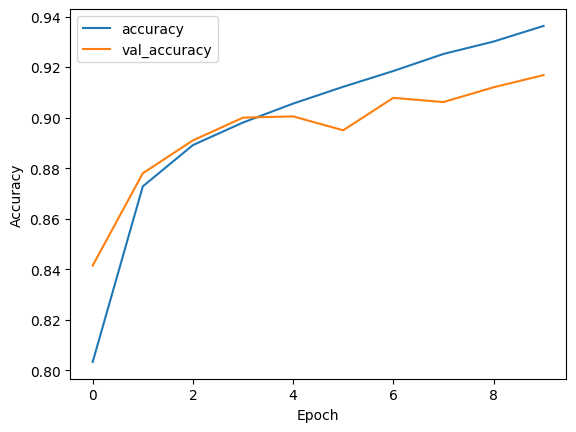

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy}")

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
